In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [36]:
df = pd.read_excel("data_with_xray_type.xlsx")

In [37]:
df.head()

,id,username,status,assigned_to,created_on,created_on_ist,created_on_day,created_on_month,created_on_year,created_on_converted_to_minutes,...,updated_by,deleted_by,group_id,image_type,shoot_id,rejected_by,ras_count,reporting_extended,reporting_time_limit,xray_type
0,57703,Drone_1,processed,Dr_Ravi_Chavan,2020-08-03 08:54:23,2020-08-03 14:24:23,Monday,August,2020,864,...,Dr_Ravi_Chavan,NaN,45011,xray,0,None,1,0,2020-08-03 10:01:31,Chest PA
1,57608,Gayatri_1,viewed,Dr_Ravi_Chavan,2020-08-03 07:21:04,2020-08-03 12:51:04,Monday,August,2020,771,...,Gayatri_1,NaN,44901,xray,0,None,1,0,2020-08-03 07:57:16,Chest PA
2,57614,Gayatri_1,viewed,Dr_Ravi_Chavan,2020-08-03 07:25:29,2020-08-03 12:55:29,Monday,August,2020,775,...,Gayatri_1,NaN,44907,xray,0,None,1,0,2020-08-03 09:46:14,Chest PA
3,57657,Gayatri_1,viewed,Dr_Ravi_Chavan,2020-08-03 07:40:10,2020-08-03 13:10:10,Monday,August,2020,790,...,Gayatri_1,NaN,44956,xray,0,None,1,0,2020-08-03 08:25:49,Chest PA
4,57714,GMC_1,viewed,Dr_Ravi_Chavan,2020-08-03 08:52:00,2020-08-03 14:22:00,Monday,August,2020,862,...,GMC_1,NaN,45004,xray,0,None,1,0,2020-08-03 10:01:31,Chest PA


In [38]:
df.columns

Index(['id', 'username', 'status', 'assigned_to', 'created_on',
       'created_on_ist', 'created_on_day', 'created_on_month',
       'created_on_year', 'created_on_converted_to_minutes', 'time_elapsed',
       'time_elapsed_hrs', 'time_elapsed_minutes',
       'total_time_elapsed_in_minutes', 'updated_on', 'updated_on_ist',
       'updated_by', 'deleted_by', 'group_id', 'image_type', 'shoot_id',
       'rejected_by', 'ras_count', 'reporting_extended',
       'reporting_time_limit', 'xray_type'],
      dtype='object')

In [39]:
final_df = df[['created_on_day','created_on_month','created_on_year','created_on_converted_to_minutes','xray_type','total_time_elapsed_in_minutes']]

In [40]:
final_df.head()

,created_on_day,created_on_month,created_on_year,created_on_converted_to_minutes,xray_type,total_time_elapsed_in_minutes
0,Monday,August,2020,864,Chest PA,37
1,Monday,August,2020,771,Chest PA,5
2,Monday,August,2020,775,Chest PA,112
3,Monday,August,2020,790,Chest PA,16
4,Monday,August,2020,862,Chest PA,40


In [41]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40125 entries, 0 to 40124
Data columns (total 6 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   created_on_day                   40125 non-null  object
 1   created_on_month                 40125 non-null  object
 2   created_on_year                  40125 non-null  int64 
 3   created_on_converted_to_minutes  40125 non-null  int64 
 4   xray_type                        40125 non-null  object
 5   total_time_elapsed_in_minutes    40125 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 1.8+ MB


In [42]:
final_df.xray_type.value_counts().reset_index().rename(columns={'index':'xray_type', 'xray_type':'count'})

,xray_type,count
0,Chest PA,20387
1,Chest,5549
2,Chest AP,3288
3,Spine LS,1596
4,Spine Cervical,761
...,...,...
73,Arms Both,2
74,Forearms Both,2
75,Elbows Both,2
76,Thighs Both,1


In [43]:
len(final_df.xray_type.unique())

78

In [44]:
merged_days = pd.concat([final_df,pd.get_dummies(final_df.created_on_day)],axis='columns')
merged_days.head()

,created_on_day,created_on_month,created_on_year,created_on_converted_to_minutes,xray_type,total_time_elapsed_in_minutes,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,Monday,August,2020,864,Chest PA,37,0,1,0,0,0,0,0
1,Monday,August,2020,771,Chest PA,5,0,1,0,0,0,0,0
2,Monday,August,2020,775,Chest PA,112,0,1,0,0,0,0,0
3,Monday,August,2020,790,Chest PA,16,0,1,0,0,0,0,0
4,Monday,August,2020,862,Chest PA,40,0,1,0,0,0,0,0


In [45]:
merged_years = pd.concat([merged_days,pd.get_dummies(final_df.created_on_month)],axis='columns')
merged_years.head()

,created_on_day,created_on_month,created_on_year,created_on_converted_to_minutes,xray_type,total_time_elapsed_in_minutes,Friday,Monday,Saturday,Sunday,...,December,February,January,July,June,March,May,November,October,September
0,Monday,August,2020,864,Chest PA,37,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Monday,August,2020,771,Chest PA,5,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Monday,August,2020,775,Chest PA,112,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Monday,August,2020,790,Chest PA,16,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Monday,August,2020,862,Chest PA,40,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
fnl = pd.concat([merged_years,pd.get_dummies(final_df.xray_type)],axis = 'columns')
fnl.head()

,created_on_day,created_on_month,created_on_year,created_on_converted_to_minutes,xray_type,total_time_elapsed_in_minutes,Friday,Monday,Saturday,Sunday,...,Spine Dorso-Lumbar,Spine LS,TM Joint Left,TM Joint Right,Thigh Left,Thigh Right,Thighs Both,Wrist Left,Wrist Right,Wrists Both
0,Monday,August,2020,864,Chest PA,37,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Monday,August,2020,771,Chest PA,5,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Monday,August,2020,775,Chest PA,112,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Monday,August,2020,790,Chest PA,16,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Monday,August,2020,862,Chest PA,40,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
for i in fnl.columns:
    print(i)

created_on_day
created_on_month
created_on_year
created_on_converted_to_minutes
xray_type
total_time_elapsed_in_minutes
Friday
Monday
Saturday
Sunday
Thursday
Tuesday
Wednesday
April
August
December
February
January
July
June
March
May
November
October
September
Abdomen
Adenoid
Ankle Left
Ankle Right
Ankles Both
Arm Left
Arm Right
Arms Both
Barium
Chest
Chest AP
Chest Lateral
Chest Left
Chest PA
Chest Right
DRU
Elbow Left
Elbow Right
Elbows Both
Feet Both
Foot Left
Foot Right
Forearm Left
Forearm Right
Forearms Both
Fracture
HSG
Hand
Hand Left
Hand Right
Hands Both
Heel Left
Heel Right
Heels Both
Hip Left
Hip Right
Hips Both
IVP
Knee Left
Knee Right
Knees Both
Kub
Leg Left
Leg Right
Legs Both
Mandible Left
Mandible Right
Mandibles Both
Mastoid Left
Mastoid Right
Mastoids Both
Nasal Bones
Neck
PBH / Hip
PBH / Hip Left
PBH / Hip Right
PBH / Hips Both
Paranasal
Sacroiliac Both
Sacroiliac Left
Sacroiliac Right
Shoulder Left
Shoulder Right
Shoulders Both
Skull
Spine
Spine Cervical
Spine Dor

In [60]:
fnl.drop(columns=['created_on_day','created_on_month','xray_type'],inplace=True)

KeyError: "['created_on_day' 'created_on_month' 'xray_type'] not found in axis"

In [61]:
fnl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40125 entries, 0 to 40124
Data columns (total 100 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   created_on_year                  40125 non-null  int64
 1   created_on_converted_to_minutes  40125 non-null  int64
 2   total_time_elapsed_in_minutes    40125 non-null  int64
 3   Friday                           40125 non-null  uint8
 4   Monday                           40125 non-null  uint8
 5   Saturday                         40125 non-null  uint8
 6   Sunday                           40125 non-null  uint8
 7   Thursday                         40125 non-null  uint8
 8   Tuesday                          40125 non-null  uint8
 9   Wednesday                        40125 non-null  uint8
 10  April                            40125 non-null  uint8
 11  August                           40125 non-null  uint8
 12  December                         40125 non-nu

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [63]:
X = fnl.drop(columns='total_time_elapsed_in_minutes')
y = fnl.total_time_elapsed_in_minutes

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state=42)

In [65]:
print("X_train : {}".format(X_train.shape))
print("X_test : {}".format(X_test.shape))
print("y_train : {}".format(y_train.shape))
print("y_test : {}".format(y_test.shape))

X_train : (32100, 99)
X_test : (8025, 99)
y_train : (32100,)
y_test : (8025,)


In [66]:
test = pd.concat([X_test,y_test],axis="columns")

In [67]:
LinearReg = LinearRegression()
LinearReg.fit(X_train,y_train)

LinearRegression()

In [68]:
y_pred = LinearReg.predict(X_test)

In [69]:
diff = pd.DataFrame({'Actual test':y_test,'Predicted test':y_pred})
diff

,Actual test,Predicted test
18115,16,67.707276
11667,7,138.929208
30679,828,143.231807
29601,95,85.012047
24224,85,100.296905
...,...,...
36131,36,146.393106
1166,170,162.978023
22477,11,48.636518
20745,13,54.414067


In [70]:
pd.DataFrame(data=y_pred,index=test.index,columns=['predicted_values'])

,predicted_values
18115,67.707276
11667,138.929208
30679,143.231807
29601,85.012047
24224,100.296905
...,...
36131,146.393106
1166,162.978023
22477,48.636518
20745,54.414067


In [71]:
pd.concat([test,pd.DataFrame(data=y_pred,index=test.index,columns=['predicted_values'])],axis='columns')

,created_on_year,created_on_converted_to_minutes,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,April,...,TM Joint Left,TM Joint Right,Thigh Left,Thigh Right,Thighs Both,Wrist Left,Wrist Right,Wrists Both,total_time_elapsed_in_minutes,predicted_values
18115,2020,615,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,16,67.707276
11667,2020,772,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,7,138.929208
30679,2020,1138,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,828,143.231807
29601,2020,738,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,95,85.012047
24224,2020,819,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,85,100.296905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36131,2019,864,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,36,146.393106
1166,2020,1028,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,170,162.978023
22477,2020,812,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,11,48.636518
20745,2020,785,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,13,54.414067


### Try linear with pycaret

In [27]:
from pycaret.regression import *

In [28]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40125 entries, 0 to 40124
Data columns (total 6 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   created_on_day                   40125 non-null  object
 1   created_on_month                 40125 non-null  object
 2   created_on_year                  40125 non-null  int64 
 3   created_on_converted_to_minutes  40125 non-null  int64 
 4   xray_type                        40125 non-null  object
 5   total_time_elapsed_in_minutes    40125 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 1.8+ MB


In [29]:
train_data = final_df.sample(frac=0.8,random_state=786).reset_index(drop=True)
unseen_data = final_df.drop(train_data.index).reset_index(drop=True)

In [30]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32100 entries, 0 to 32099
Data columns (total 6 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   created_on_day                   32100 non-null  object
 1   created_on_month                 32100 non-null  object
 2   created_on_year                  32100 non-null  int64 
 3   created_on_converted_to_minutes  32100 non-null  int64 
 4   xray_type                        32100 non-null  object
 5   total_time_elapsed_in_minutes    32100 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 1.5+ MB


In [31]:
unseen_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8025 entries, 0 to 8024
Data columns (total 6 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   created_on_day                   8025 non-null   object
 1   created_on_month                 8025 non-null   object
 2   created_on_year                  8025 non-null   int64 
 3   created_on_converted_to_minutes  8025 non-null   int64 
 4   xray_type                        8025 non-null   object
 5   total_time_elapsed_in_minutes    8025 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 376.3+ KB


In [32]:
base_setup = setup(data=train_data,target='total_time_elapsed_in_minutes')

 
Setup Succesfully Completed.


,Description,Value
0,session_id,261
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(32100, 6)"
4,Missing Values,False
5,Numeric Features,1
6,Categorical Features,4
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [33]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
0,Light Gradient Boosting Machine,94.7766,158664.8218,371.3099,0.0276,1.4245,5.2770,0.2571
1,TheilSen Regressor,100.1336,160963.5832,373.6245,0.0182,1.4800,5.3181,17.4060
2,Bayesian Ridge,107.5389,160828.0013,373.6748,0.0161,1.5510,6.1935,0.4334
3,Lasso Regression,107.2977,160947.4511,373.7553,0.0161,1.5630,6.3285,0.1120
4,Ridge Regression,108.7082,161833.8152,375.0724,0.0071,1.5484,6.1215,0.0475
5,Elastic Net,108.3972,161985.0203,375.2570,0.0057,1.5991,6.6315,0.0750
6,Linear Regression,108.9051,162548.4650,375.9459,0.0026,1.5487,6.1168,0.2373
7,Orthogonal Matching Pursuit,108.0936,162776.0263,376.2858,0.0003,1.5549,6.2373,0.0550
8,Lasso Least Angle Regression,108.9970,162709.2121,376.3338,-0.0020,1.6085,6.7031,0.0536
9,Support Vector Machine,91.2613,164060.8286,377.8841,-0.0100,1.3294,3.1420,60.6017


LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=261, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [34]:
lr = create_model('lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,110.9413,171260.0814,413.8358,-0.0555,1.5299,5.8500
1,114.5959,193807.7019,440.2360,0.0109,1.5623,6.1893
2,123.2938,328267.2340,572.9461,0.0085,1.5599,6.0995
3,111.9201,270805.9304,520.3902,0.0069,1.5440,6.0462
4,99.9731,61736.7482,248.4688,0.0087,1.5775,6.6670
5,117.3479,302938.7551,550.3987,0.0042,1.5009,5.5392
6,99.6509,31759.0247,178.2106,0.0115,1.5670,6.2115
7,113.0874,177864.5365,421.7399,-0.0134,1.5124,5.6233
8,97.5306,31602.6589,177.7714,-0.0014,1.5704,6.7353
9,100.7095,55441.9784,235.4612,0.0455,1.5633,6.2063


In [35]:
print(lr)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)


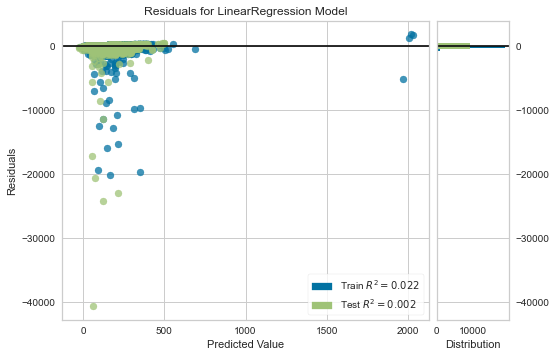

In [36]:
plot_model(lr)

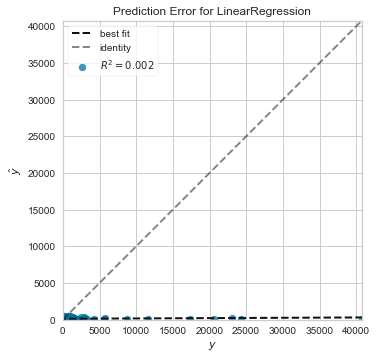

In [39]:
plot_model(lr,plot='error')

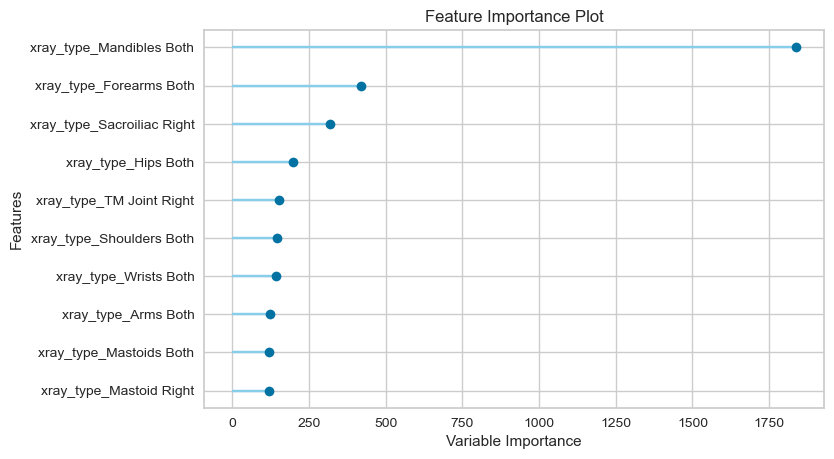

In [37]:
plot_model(lr,plot='feature')

In [40]:
evaluate_model(lr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

### predict on hold out data - it is some data from the train set

In [41]:
final_model = predict_model(lr)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Linear Regression,113.7999,422724.1937,650.1724,0.0018,1.5581,6.3616


In [42]:
final_model

,created_on_converted_to_minutes,created_on_day_Friday,created_on_day_Monday,created_on_day_Saturday,created_on_day_Sunday,created_on_day_Thursday,created_on_day_Tuesday,created_on_day_Wednesday,created_on_month_April,created_on_month_August,...,xray_type_TM Joint Left,xray_type_TM Joint Right,xray_type_Thigh Left,xray_type_Thigh Right,xray_type_Thighs Both,xray_type_Wrist Left,xray_type_Wrist Right,xray_type_Wrists Both,total_time_elapsed_in_minutes,Label
0,627.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,140.0666
1,1320.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,85.0,238.7811
2,948.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,106.0,140.5055
3,754.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,49.4517
4,964.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,235.6858
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9626,1049.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,74.0,108.2926
9627,760.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,143.0,106.7487
9628,724.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,69.0,149.7867
9629,891.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,176.0,103.7126


In [43]:
unseen_predictions = predict_model(lr , data=unseen_data)
unseen_predictions.head()

,created_on_day,created_on_month,created_on_year,created_on_converted_to_minutes,xray_type,total_time_elapsed_in_minutes,Label
index,,,,,,,
0,Thursday,July,2020,1344,Chest PA,64,97.1666
1,Thursday,July,2020,1164,Chest PA,80,90.6873
2,Thursday,July,2020,1218,Chest PA,33,92.6311
3,Thursday,July,2020,824,Chest PA,11278,78.4487
4,Sunday,July,2020,791,Chest PA,313,213.1743


In [44]:
dd = {
    "created_on_day":["Thursday"],
    "created_on_month":["July"],
    "created_on_year":[2020],
    "created_on_converted_to_minutes":[240],
    "xray_type":["Chest PA"],
}
data = pd.DataFrame.from_dict(data=dd)

In [45]:
predict_model(lr,data=data)

,created_on_day,created_on_month,created_on_year,created_on_converted_to_minutes,xray_type,Label
index,,,,,,
0,Thursday,July,2020,240,Chest PA,57.427


In [46]:
predictions = predict_model(lr, data = unseen_data)

In [47]:
df.to_excel()

TypeError: to_excel() missing 1 required positional argument: 'excel_writer'

In [48]:
pd.concat([predictions.total_time_elapsed_in_minutes,predictions.Label],axis='columns').rename(columns={"total_time_elapsed_in_minutes":"Actual test","Label":"Predicted test"}).to_excel("linear_line_of_test_vs_predict.xlsx",sheet_name="with_xray_type",header=True,index=False)

In [49]:
predictions.head()

,created_on_day,created_on_month,created_on_year,created_on_converted_to_minutes,xray_type,total_time_elapsed_in_minutes,Label
index,,,,,,,
0,Thursday,July,2020,1344,Chest PA,64,97.1666
1,Thursday,July,2020,1164,Chest PA,80,90.6873
2,Thursday,July,2020,1218,Chest PA,33,92.6311
3,Thursday,July,2020,824,Chest PA,11278,78.4487
4,Sunday,July,2020,791,Chest PA,313,213.1743


In [50]:
final_df[(final_df.created_on_day=="Thursday") & (final_df.created_on_month=="July") & (final_df.created_on_converted_to_minutes==824)]

,created_on_day,created_on_month,created_on_year,created_on_converted_to_minutes,xray_type,total_time_elapsed_in_minutes
25087,Thursday,July,2020,824,Chest PA,14
25305,Thursday,July,2020,824,Chest PA,13
28971,Thursday,July,2020,824,Chest PA,26
32103,Thursday,July,2020,824,Chest PA,11278


array([[<AxesSubplot:title={'center':'created_on_year'}>,
        <AxesSubplot:title={'center':'created_on_converted_to_minutes'}>],
       [<AxesSubplot:title={'center':'total_time_elapsed_in_minutes'}>,
        <AxesSubplot:>]], dtype=object)

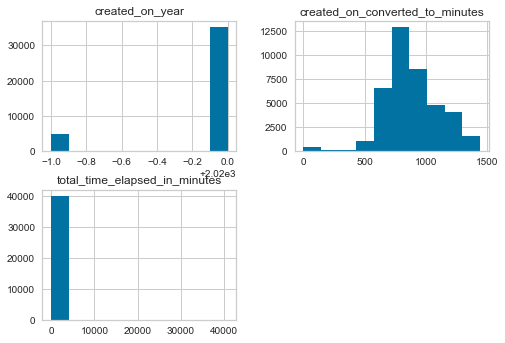

In [51]:
final_df.hist()

### Bayesian Ridge

In [42]:
train_data_br = final_df.sample(frac=0.8,random_state=786).reset_index(drop=True)
unseen_data_br = final_df.drop(train_data.index).reset_index(drop=True)

In [43]:
base_setup = setup(data=train_data_br,target='total_time_elapsed_in_minutes')

 
Setup Succesfully Completed.


,Description,Value
0,session_id,1589
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(32100, 6)"
4,Missing Values,False
5,Numeric Features,1
6,Categorical Features,4
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [44]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
0,TheilSen Regressor,100.5909,238534.5447,444.5161,0.0128,1.4742,5.2664,16.7361
1,Bayesian Ridge,108.7725,238542.4925,444.6110,0.0119,1.5615,6.3436,0.5010
2,Lasso Regression,108.9333,238661.2182,444.8426,0.0102,1.5750,6.4829,0.1139
3,Linear Regression,110.1274,239215.0731,445.2803,0.0091,1.5553,6.2639,0.2738
4,Ridge Regression,110.0302,239196.8052,445.3318,0.0083,1.5549,6.2696,0.0460
5,Elastic Net,109.7329,239349.5181,445.8382,0.0039,1.6051,6.7418,0.0733
6,Orthogonal Matching Pursuit,110.3064,239689.0472,446.2021,0.0020,1.5694,6.4453,0.0522
7,Lasso Least Angle Regression,110.3391,239856.7817,446.5406,-0.0006,1.6139,6.8162,0.0512
8,Support Vector Machine,91.9802,241286.3997,448.1321,-0.0090,1.3289,3.1720,60.2541
9,Huber Regressor,91.5985,241785.4497,448.7155,-0.0121,1.3385,3.3904,3.1064


TheilSenRegressor(copy_X=True, fit_intercept=True, max_iter=300,
                  max_subpopulation=10000, n_jobs=-1, n_subsamples=None,
                  random_state=1589, tol=0.001, verbose=False)

In [46]:
tr = create_model('tr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,103.6339,225154.7349,474.5047,0.0039,1.4641,4.7586
1,95.9927,79415.0443,281.8067,0.0388,1.4609,5.0084
2,97.0242,166272.4350,407.7652,0.0030,1.4497,4.8837
3,109.5970,830465.2179,911.2986,-0.0001,1.4404,5.1350
4,100.2255,172486.7527,415.3152,0.0095,1.4967,5.6805
5,118.6566,475849.2092,689.8182,0.0011,1.4608,5.0856
6,92.9267,99478.4347,315.4020,0.0052,1.4745,5.2969
7,95.5782,56221.8942,237.1116,0.0314,1.5444,6.1983
8,90.3879,58134.7902,241.1116,0.0277,1.4685,5.2247
9,101.8867,221866.9335,471.0275,0.0071,1.4821,5.3920


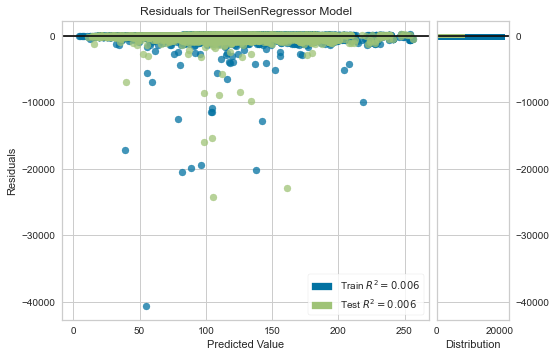

In [47]:
plot_model(tr)

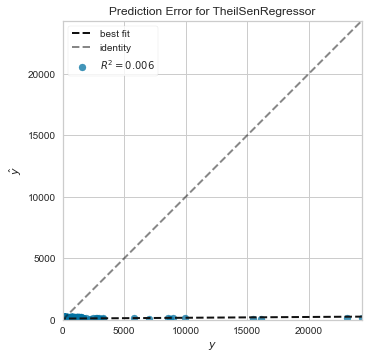

In [48]:
plot_model(tr,plot='error')

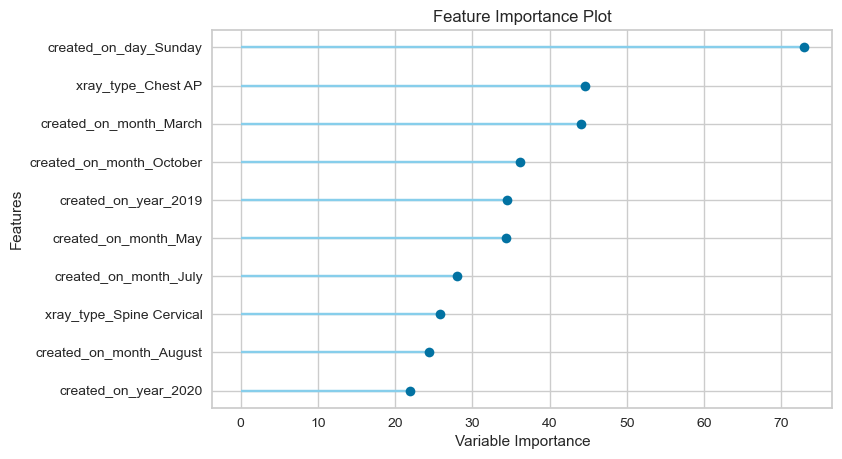

In [49]:
plot_model(tr,plot='feature')

In [50]:
evaluate_model(tr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [52]:
final_tr_model = predict_model(tr)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Theil Sen Regressor,102.9512,241938.1467,491.8721,0.0065,1.4829,5.3543


In [53]:
final_tr_model

,created_on_converted_to_minutes,created_on_day_Friday,created_on_day_Monday,created_on_day_Saturday,created_on_day_Sunday,created_on_day_Thursday,created_on_day_Tuesday,created_on_day_Wednesday,created_on_month_April,created_on_month_August,...,xray_type_TM Joint Left,xray_type_TM Joint Right,xray_type_Thigh Left,xray_type_Thigh Right,xray_type_Thighs Both,xray_type_Wrist Left,xray_type_Wrist Right,xray_type_Wrists Both,total_time_elapsed_in_minutes,Label
0,705.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,82.0,91.0881
1,839.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37.0,114.8023
2,728.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0,53.7610
3,719.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52.0,110.1194
4,995.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,148.5460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9626,1395.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,706.0,117.0058
9627,847.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,128.9215
9628,1240.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,51.0,75.2744
9629,1088.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23.0,78.8524


In [54]:
unseen_predictions_tr = predict_model(tr , data=unseen_data)
unseen_predictions_tr.head()

,created_on_day,created_on_month,created_on_year,created_on_converted_to_minutes,xray_type,total_time_elapsed_in_minutes,Label
index,,,,,,,
0,Thursday,July,2020,1344,Chest PA,64,88.8787
1,Thursday,July,2020,1164,Chest PA,80,86.8225
2,Thursday,July,2020,1218,Chest PA,33,87.4394
3,Thursday,July,2020,824,Chest PA,11278,82.9386
4,Sunday,July,2020,791,Chest PA,313,176.7811


### Try with one feature i.e created_on_day

In [72]:
one_feature_df = final_df.loc[:,['created_on_day','total_time_elapsed_in_minutes']]
one_feature_df.head()

,created_on_day,total_time_elapsed_in_minutes
0,Monday,37
1,Monday,5
2,Monday,112
3,Monday,16
4,Monday,40


In [73]:
final_one_feature_dummies = pd.concat([one_feature_df,pd.get_dummies(one_feature_df.created_on_day)],axis='columns')
final_one_feature_dummies.drop(columns='created_on_day',inplace=True)

In [74]:
final_one_feature_dummies.head()

,total_time_elapsed_in_minutes,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,37,0,1,0,0,0,0,0
1,5,0,1,0,0,0,0,0
2,112,0,1,0,0,0,0,0
3,16,0,1,0,0,0,0,0
4,40,0,1,0,0,0,0,0


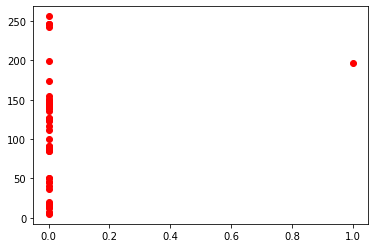

In [75]:
plt.scatter(final_one_feature_dummies.Friday.head(50),final_one_feature_dummies.total_time_elapsed_in_minutes.head(50),color='Red',marker='o')

In [76]:
X = final_one_feature_dummies.drop(columns='total_time_elapsed_in_minutes')
y = final_one_feature_dummies.total_time_elapsed_in_minutes

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [78]:
print("X train {}".format(X_train.shape))
print("X test {}".format(X_test.shape))
print("y train {}".format(y_train.shape))
print("y test {}".format(y_test.shape))

X train (32100, 7)
X test (8025, 7)
y train (32100,)
y test (8025,)


In [79]:
from sklearn.linear_model import LinearRegression
one_feature_lr_model = LinearRegression()
one_feature_lr_model.fit(X_train,y_train)

LinearRegression()

In [80]:
elapsed_time_prediction = one_feature_lr_model.predict(X_test)

In [81]:
elapsed_time_prediction

array([103.81591797, 201.43554688, 129.90234375, ...,  93.23022461,
        92.12963867, 125.60205078])

In [82]:
y_test

18115     16
11667      7
30679    828
29601     95
24224     85
        ... 
36131     36
1166     170
22477     11
20745     13
17980     44
Name: total_time_elapsed_in_minutes, Length: 8025, dtype: int64

In [83]:
pd.DataFrame({"Actual test":y_test, "Predicted_value":elapsed_time_prediction})

,Actual test,Predicted_value
18115,16,103.815918
11667,7,201.435547
30679,828,129.902344
29601,95,92.129639
24224,85,103.815918
...,...,...
36131,36,125.602051
1166,170,129.902344
22477,11,93.230225
20745,13,92.129639


In [85]:
one_feature_lr_model.score(X,y)

0.0028875810624166

### Ty with one feature i.e Created on hrs

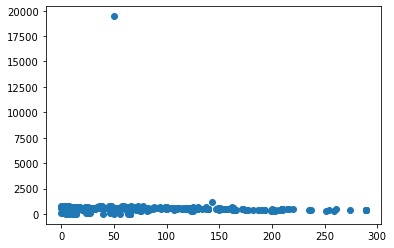

In [153]:
before_5am = one_feature_df_with_hrs[one_feature_df_with_hrs.created_on_converted_to_minutes<=300].sort_values(by='created_on_converted_to_minutes',ascending=False)
plt.scatter(before_5am.created_on_converted_to_minutes,before_5am.total_time_elapsed_in_minutes)

In [86]:
one_feature_df_with_hrs = final_df.loc[:,['created_on_converted_to_minutes','total_time_elapsed_in_minutes']]
one_feature_df_with_hrs.head()

,created_on_converted_to_minutes,total_time_elapsed_in_minutes
0,864,37
1,771,5
2,775,112
3,790,16
4,862,40


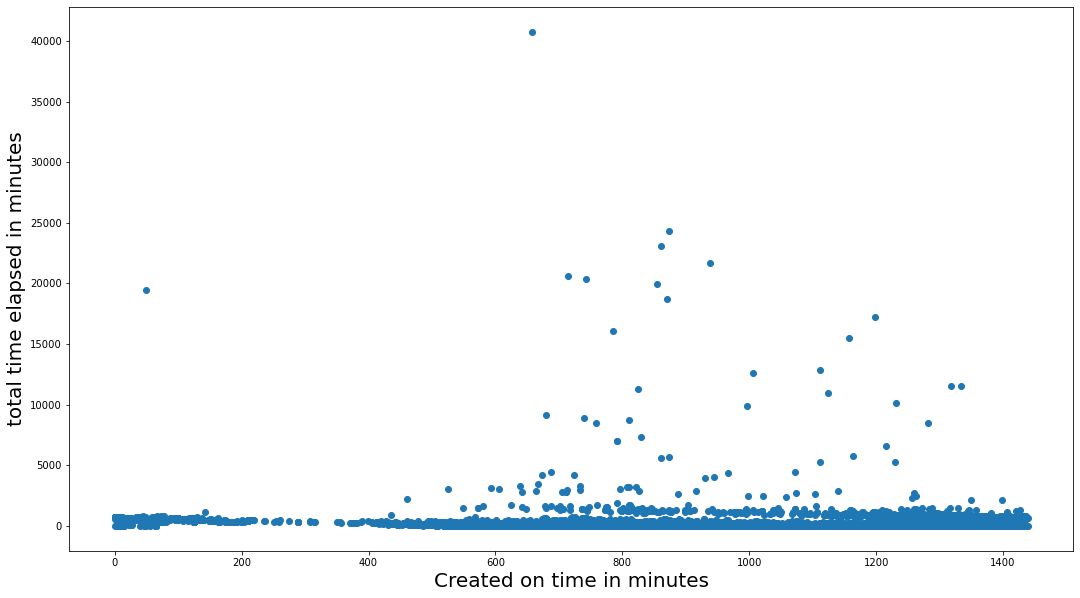

In [96]:
plt.figure(figsize=(18,10)) 
plt.scatter(one_feature_df_with_hrs.created_on_converted_to_minutes,one_feature_df_with_hrs.total_time_elapsed_in_minutes,marker = 'o')
plt.xlabel("Created on time in minutes",fontsize=20)
plt.ylabel("total time elapsed in minutes",fontsize=20)
plt.show()

In [97]:
X = one_feature_df_with_hrs.created_on_converted_to_minutes
y = one_feature_df_with_hrs.total_time_elapsed_in_minutes

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [99]:
print("X train {}".format(X_train.shape))
print("X test {}".format(X_test.shape))
print("y train {}".format(y_train.shape))
print("y test {}".format(y_test.shape))

X train (32100,)
X test (8025,)
y train (32100,)
y test (8025,)


In [100]:
X_train.to_frame()

,created_on_converted_to_minutes
14607,738
8091,772
27800,942
14699,1181
35390,1204
...,...
6265,736
11284,846
38158,544
860,943


In [103]:
lin_reg = LinearRegression()
lin_reg.fit(X_train.to_frame(),y_train)

LinearRegression()

In [104]:
predictions_with_only_one_feature = lin_reg.predict(X_test.to_frame())

In [110]:
pd.Series(lin_reg.intercept_ + X).iloc[18115]

695.0697178097429

In [133]:
import numpy as np
m,c = np.polyfit(X,y,1)
print(m,c)

0.04159680548701716 79.36017485086354


In [134]:
(len(X.to_numpy()))

40125

In [139]:
numerator = 0
denominator = 0
for i in range(len(X)):
    numerator += (X[i]-np.mean(X)) * (y[i]-np.mean(y))
    denominator += (X[i]-np.mean(X)) ** 2
m_manual = numerator/denominator
print(m_manual)
print(np.mean(y) - (m_manual * np.mean(X)))

0.04159680548701777
79.3601748508629


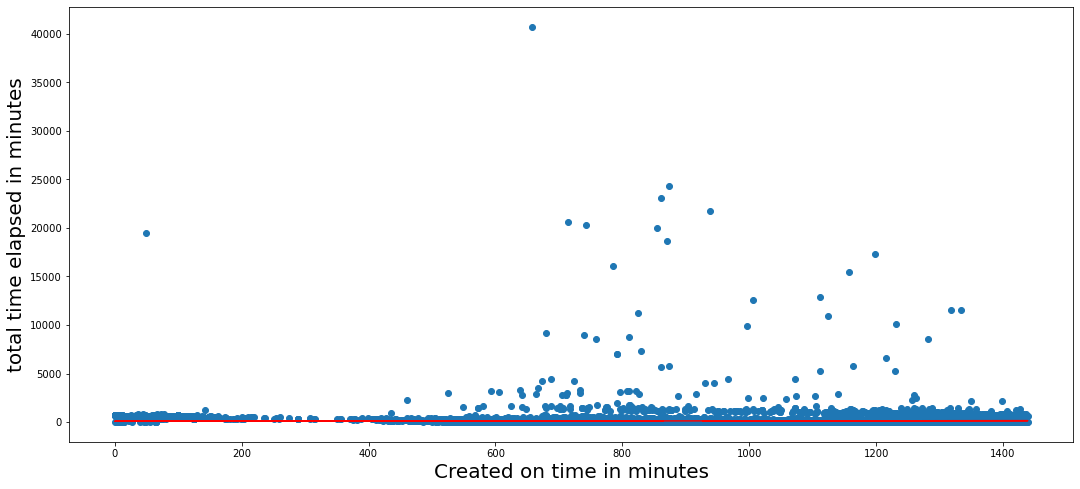

In [138]:
#plt.plot(np.unique(X), np.poly1d(np.polyfit(X, y, 1))(np.unique(X)))
plt.figure(figsize=(18,8)) 
plt.scatter(one_feature_df_with_hrs.created_on_converted_to_minutes,one_feature_df_with_hrs.total_time_elapsed_in_minutes,marker = 'o')
plt.xlabel("Created on time in minutes",fontsize=20)
plt.ylabel("total time elapsed in minutes",fontsize=20)
plt.plot(X,m*X+c,color="Red")
plt.show()

In [105]:
y_test.to_frame()

,total_time_elapsed_in_minutes
18115,16
11667,7
30679,828
29601,95
24224,85
...,...
36131,36
1166,170
22477,11
20745,13


In [106]:
pd.DataFrame({"Actual test":y_test, "Predicted_value":predictions_with_only_one_feature})

,Actual test,Predicted_value
18115,16,104.615465
11667,7,110.881615
30679,828,125.489327
29601,95,109.524614
24224,85,112.757469
...,...,...
36131,36,114.553499
1166,170,121.099031
22477,11,112.478086
20745,13,111.400468


In [148]:
lin_reg.score(X.to_frame(),y) * 100

0.03650487640708411

In [100]:
pd.DataFrame({"Actual test":y_test, "Predicted_value":predictions_with_only_one_feature}).to_csv("with_one_feature_created_on_hrs_toMin.csv",header=True,index=False)

### Try with 3 features i.e xray_type and created_on_converted_to_minutes

In [26]:
final_df

,created_on_day,created_on_month,created_on_year,created_on_converted_to_minutes,xray_type,total_time_elapsed_in_minutes
0,Monday,August,2020,864,Chest PA,37
1,Monday,August,2020,771,Chest PA,5
2,Monday,August,2020,775,Chest PA,112
3,Monday,August,2020,790,Chest PA,16
4,Monday,August,2020,862,Chest PA,40
...,...,...,...,...,...,...
40120,Saturday,November,2019,1180,Nasal Bones,59
40121,Saturday,December,2019,916,Chest,75
40122,Wednesday,November,2019,912,Chest,59
40123,Friday,November,2019,863,Chest,111


In [27]:
df_with_two_feature = final_df.loc[:,['xray_type','created_on_converted_to_minutes','total_time_elapsed_in_minutes']]

In [28]:
df_with_two_feature = pd.concat([df_with_two_feature,pd.get_dummies(df_with_two_feature.xray_type)],axis='columns').drop(columns='xray_type')

In [29]:
X = df_with_two_feature.drop(columns='total_time_elapsed_in_minutes')
y = df_with_two_feature.total_time_elapsed_in_minutes
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.2,random_state=100)
print("X train {}".format(X_train.shape))
print("X test {}".format(X_test.shape))
print("y train {}".format(y_train.shape))
print("y test {}".format(y_test.shape))

X train (32100, 79)
X test (8025, 79)
y train (32100,)
y test (8025,)


In [30]:
len(X_train.columns)

79

In [31]:
Linear_reg_model = LinearRegression()
Linear_reg_model.fit(X_train,y_train)

LinearRegression()

In [ ]:
Linear_reg_model.score(X_train,y_train)

In [32]:
prediction_with_two_features = Linear_reg_model.predict(X_test)

In [128]:
pd.DataFrame({"Actual test":y_test, "Predicted_value":prediction_with_two_features}).to_csv("with_two_feature_xray_type_and_created_on.csv",header=True,index=False)

### With only 1 feature : Include only records created between 9am - 9pm

In [164]:
include_nine_am_to_pm = final_df[(final_df.created_on_converted_to_minutes >= 540) & (final_df.created_on_converted_to_minutes <= 1260)].sort_values(by='created_on_converted_to_minutes')[['created_on_converted_to_minutes','total_time_elapsed_in_minutes']]
include_nine_am_to_pm.sample(10)

,created_on_converted_to_minutes,total_time_elapsed_in_minutes
8678,642,41
27243,1096,39
11843,877,2
28138,724,54
9458,709,46
23007,837,63
38057,717,87
3416,552,128
4482,734,200
15582,1029,18


In [170]:
X = include_nine_am_to_pm.created_on_converted_to_minutes
y = include_nine_am_to_pm.total_time_elapsed_in_minutes
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=42)
print("X train {}".format(X_train.shape))
print("X test {}".format(X_test.shape))
print("y train {}".format(y_train.shape))
print("y test {}".format(y_test.shape))

X train (29455,)
X test (7364,)
y train (29455,)
y test (7364,)


In [175]:
import numpy as np
m,c = np.polyfit(X,y,1)
print(m,c)

0.06532846167486694 40.69282486736266


In [176]:
len(X)

36819

In [ ]:
numerator1 = 0
denominator1 = 0
for i in range(len(X)):
    numerator1 += (X[i]-np.mean(X)) * (y[i]-np.mean(y))
    denominator1 += (X[i]-np.mean(X)) ** 2
m_manual = numerator1/denominator1
print(m_manual)
print(np.mean(y) - (m_manual * np.mean(X)))

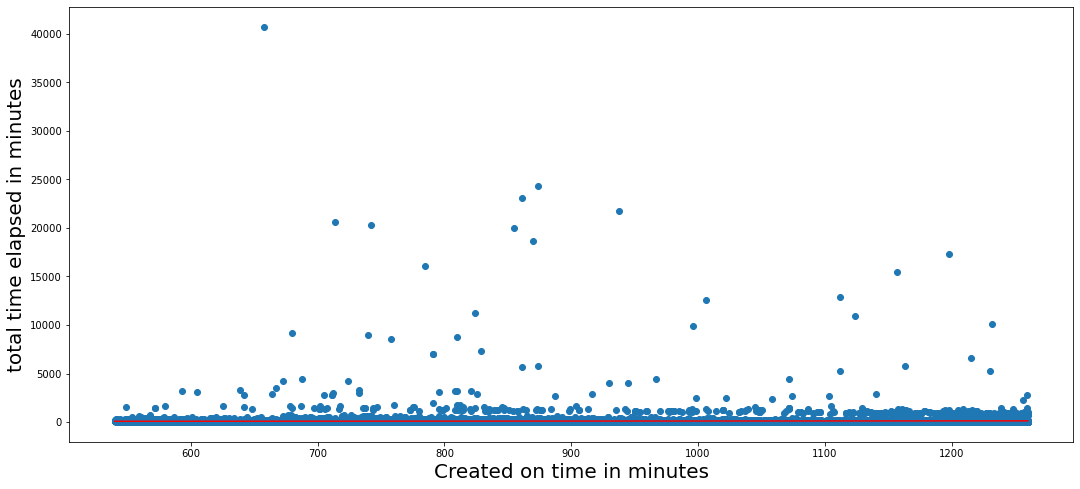

In [180]:
#plt.plot(np.unique(X), np.poly1d(np.polyfit(X, y, 1))(np.unique(X)))
plt.figure(figsize=(18,8)) 
plt.scatter(X,y,marker = 'o')
plt.xlabel("Created on time in minutes",fontsize=20)
plt.ylabel("total time elapsed in minutes",fontsize=20)
plt.plot(X,m*X+c,color="Red")
plt.show()

In [182]:
include_reg_model = LinearRegression()
include_reg_model.fit(X_train.to_frame(),y_train)

LinearRegression()

In [188]:
include_y_pred = include_reg_model.predict(X_test.to_frame())

In [190]:
pd.DataFrame({"Actual test":y_test, "Predicted_value":include_y_pred})

,Actual test,Predicted_value
11511,25,92.883746
23383,123,94.951476
18243,40,121.041360
18473,9,102.370977
16151,80,118.669552
...,...,...
17994,267,92.944562
15040,27,97.931439
12737,32,86.802188
1052,243,99.634276


In [194]:
include_reg_model.score(X.to_frame(),y)

0.0005698648866735434

In [196]:
pd.DataFrame({"Actual test":y_test, "Predicted_value":include_y_pred}).to_csv("one_feature_inlcude_9am_9pm.csv",header=True,index=False)

### With all feature : Include only records created between 9am - 9pm

In [200]:
include_9am_9pm_all_feature = final_df[(final_df.created_on_converted_to_minutes>=540) & (final_df.created_on_converted_to_minutes<=1260)]
include_9am_9pm_all_feature.head()

,created_on_day,created_on_month,created_on_year,created_on_converted_to_minutes,xray_type,total_time_elapsed_in_minutes
0,Monday,August,2020,864,Chest PA,37
1,Monday,August,2020,771,Chest PA,5
2,Monday,August,2020,775,Chest PA,112
3,Monday,August,2020,790,Chest PA,16
4,Monday,August,2020,862,Chest PA,40


In [204]:
include_9am_9pm_all_feature.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36819 entries, 0 to 40124
Data columns (total 6 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   created_on_day                   36819 non-null  object
 1   created_on_month                 36819 non-null  object
 2   created_on_year                  36819 non-null  int64 
 3   created_on_converted_to_minutes  36819 non-null  int64 
 4   xray_type                        36819 non-null  object
 5   total_time_elapsed_in_minutes    36819 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 2.0+ MB


### converting categorical col into numerical by get_dummies

In [ ]:
# pd.concat([include_9am_9pm_all_feature,pd.get_dummies(include_9am_9pm_all_feature.created_on_day)],axis='columns')
# pd.concat([include_9am_9pm_all_feature,pd.get_dummies(include_9am_9pm_all_feature.created_on_month)],axis='columns')
# pd.concat([include_9am_9pm_all_feature,pd.get_dummies(include_9am_9pm_all_feature.xray_type)],axis='columns')

In [214]:
merged_created_days = pd.concat([include_9am_9pm_all_feature,pd.get_dummies(include_9am_9pm_all_feature.created_on_day)],axis='columns')
merged_created_days.head()

,created_on_day,created_on_month,created_on_year,created_on_converted_to_minutes,xray_type,total_time_elapsed_in_minutes,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,Monday,August,2020,864,Chest PA,37,0,1,0,0,0,0,0
1,Monday,August,2020,771,Chest PA,5,0,1,0,0,0,0,0
2,Monday,August,2020,775,Chest PA,112,0,1,0,0,0,0,0
3,Monday,August,2020,790,Chest PA,16,0,1,0,0,0,0,0
4,Monday,August,2020,862,Chest PA,40,0,1,0,0,0,0,0


In [215]:
merged_created_months = pd.concat([merged_created_days,pd.get_dummies(merged_created_days.created_on_month)],axis='columns')
merged_created_months.head()

,created_on_day,created_on_month,created_on_year,created_on_converted_to_minutes,xray_type,total_time_elapsed_in_minutes,Friday,Monday,Saturday,Sunday,...,December,February,January,July,June,March,May,November,October,September
0,Monday,August,2020,864,Chest PA,37,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Monday,August,2020,771,Chest PA,5,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Monday,August,2020,775,Chest PA,112,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Monday,August,2020,790,Chest PA,16,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Monday,August,2020,862,Chest PA,40,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [217]:
get_dummies_final_df = pd.concat([merged_created_months,pd.get_dummies(merged_created_months.xray_type)],axis='columns')
get_dummies_final_df.head()

,created_on_day,created_on_month,created_on_year,created_on_converted_to_minutes,xray_type,total_time_elapsed_in_minutes,Friday,Monday,Saturday,Sunday,...,Spine Dorso-Lumbar,Spine LS,TM Joint Left,TM Joint Right,Thigh Left,Thigh Right,Thighs Both,Wrist Left,Wrist Right,Wrists Both
0,Monday,August,2020,864,Chest PA,37,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Monday,August,2020,771,Chest PA,5,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Monday,August,2020,775,Chest PA,112,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Monday,August,2020,790,Chest PA,16,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Monday,August,2020,862,Chest PA,40,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [218]:
get_dummies_final_df.drop(columns=['created_on_day','created_on_month','xray_type'],inplace=True)

In [219]:
get_dummies_final_df.head()

,created_on_year,created_on_converted_to_minutes,total_time_elapsed_in_minutes,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,...,Spine Dorso-Lumbar,Spine LS,TM Joint Left,TM Joint Right,Thigh Left,Thigh Right,Thighs Both,Wrist Left,Wrist Right,Wrists Both
0,2020,864,37,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2020,771,5,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2020,775,112,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2020,790,16,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2020,862,40,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [220]:
X = get_dummies_final_df.drop(columns="total_time_elapsed_in_minutes")
y = get_dummies_final_df.total_time_elapsed_in_minutes
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state = 42)
print("X train {}".format(X_train.shape))
print("X test {}".format(X_test.shape))
print("y train {}".format(y_train.shape))
print("y test {}".format(y_test.shape))

X train (29455, 99)
X test (7364, 99)
y train (29455,)
y test (7364,)


In [221]:
lr_9am_9pm_all_feature_model = LinearRegression()
lr_9am_9pm_all_feature_model.fit(X_train,y_train)

LinearRegression()

In [223]:
include_all_feature_prediction = lr_9am_9pm_all_feature_model.predict(X_test)

In [224]:
pd.DataFrame({"Actual test" : y_test,"Predicted value" :include_all_feature_prediction})

,Actual test,Predicted value
13482,100,45.052246
16903,20,132.806015
39513,16,65.811661
27317,2,115.838638
38230,202,173.995071
...,...,...
13633,111,92.782990
21700,277,140.620865
4830,3,69.721237
24019,55,75.827286


In [225]:
lr_9am_9pm_all_feature_model.score(X,y)

-277075442748.4745

<AxesSubplot:>

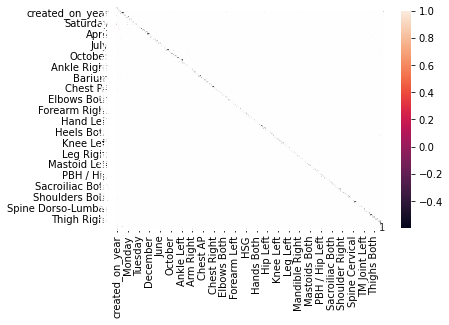

In [227]:
sns.heatmap(get_dummies_final_df.corr(),annot=True)

In [228]:
pd.DataFrame({"Actual test" : y_test,"Predicted value" :include_all_feature_prediction}).to_csv("include_9am_9pm_all_features.csv",header=True,index = False)